In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
global_stats = pd.read_csv("Resources/worldometer_data.csv")
global_stats.head(30)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
6,Peru,South America,3.301632e+07,455409,NaN,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
7,Chile,South America,1.913251e+07,366671,NaN,9889.0,NaN,340168.0,NaN,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas
8,Colombia,South America,5.093626e+07,357710,NaN,11939.0,NaN,192355.0,NaN,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas
9,Spain,Europe,4.675665e+07,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe


In [30]:
europe_df_a = global_stats[global_stats["Country/Region"] == "Russia"]
europe_df_b = global_stats[global_stats["Country/Region"] == "Sweden"]
europe_df_c = global_stats[global_stats["Country/Region"] == "Germany"]
europe_df_d = global_stats[global_stats["Country/Region"] == "France"]
europe_df_e = global_stats[global_stats["Country/Region"] == "Italy"]
europe_df_f = global_stats[global_stats["Country/Region"] == "United Kingdom"]
europe_df_g = global_stats[global_stats["Country/Region"] == "Spain"]
europe_df_h = global_stats[global_stats["Country/Region"] == "Ukraine"]
europe_df_i = global_stats[global_stats["Country/Region"] == "Poland"]
europe_df_j = global_stats[global_stats["Country/Region"] == "Romania"]

In [31]:
europe_stats = europe_df_a.append(europe_df_b)
europe_stats = europe_stats.append(europe_df_c)
europe_stats = europe_stats.append(europe_df_d)
europe_stats = europe_stats.append(europe_df_e)
europe_stats = europe_stats.append(europe_df_f)
europe_stats = europe_stats.append(europe_df_g)
europe_stats = europe_stats.append(europe_df_h)
europe_stats = europe_stats.append(europe_df_i)
europe_stats = europe_stats.append(europe_df_j)

In [32]:
europe_stats

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
3,Russia,Europe,145940924.0,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
29,Sweden,Europe,10105596.0,81967,NaN,5766.0,NaN,NaN,NaN,NaN,38.0,8111.0,571.0,863315.0,85429.0,Europe
18,Germany,Europe,83811260.0,215210,NaN,9252.0,NaN,196200.0,NaN,9758.0,236.0,2568.0,110.0,8586648.0,102452.0,Europe
19,France,Europe,65288306.0,195633,NaN,30312.0,NaN,82460.0,NaN,82861.0,384.0,2996.0,464.0,3992206.0,61147.0,Europe
15,Italy,Europe,60452568.0,249204,NaN,35187.0,NaN,201323.0,NaN,12694.0,42.0,4122.0,582.0,7099713.0,117443.0,Europe
9,Spain,Europe,46756648.0,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe
32,Ukraine,Europe,43705858.0,76808,NaN,1819.0,NaN,42524.0,NaN,32465.0,158.0,1757.0,42.0,1116641.0,25549.0,Europe
44,Poland,Europe,37842302.0,49515,NaN,1774.0,NaN,35642.0,NaN,12099.0,72.0,1308.0,47.0,2374686.0,62752.0,Europe
39,Romania,Europe,19224023.0,57895,NaN,2566.0,NaN,28992.0,NaN,26337.0,458.0,3012.0,133.0,1319369.0,68631.0,Europe


In [33]:
europe_stats = europe_stats.drop(['NewCases'], axis=1)
europe_stats = europe_stats.drop(['NewDeaths'], axis=1)
europe_stats = europe_stats.drop(['NewRecovered'], axis=1)
europe_stats = europe_stats.drop(['WHO Region'], axis=1)


In [34]:
europe_stats

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
3,Russia,Europe,145940924.0,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0
29,Sweden,Europe,10105596.0,81967,5766.0,NaN,NaN,38.0,8111.0,571.0,863315.0,85429.0
18,Germany,Europe,83811260.0,215210,9252.0,196200.0,9758.0,236.0,2568.0,110.0,8586648.0,102452.0
19,France,Europe,65288306.0,195633,30312.0,82460.0,82861.0,384.0,2996.0,464.0,3992206.0,61147.0
15,Italy,Europe,60452568.0,249204,35187.0,201323.0,12694.0,42.0,4122.0,582.0,7099713.0,117443.0
9,Spain,Europe,46756648.0,354530,28500.0,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0
32,Ukraine,Europe,43705858.0,76808,1819.0,42524.0,32465.0,158.0,1757.0,42.0,1116641.0,25549.0
44,Poland,Europe,37842302.0,49515,1774.0,35642.0,12099.0,72.0,1308.0,47.0,2374686.0,62752.0
39,Romania,Europe,19224023.0,57895,2566.0,28992.0,26337.0,458.0,3012.0,133.0,1319369.0,68631.0


In [35]:
europe_stats.describe()

,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,9.000000e+00,9.000000,9.000000,7.000000,7.000000,9.000000,9.000000,9.000000,9.000000e+00,9.000000
mean,5.701416e+07,239184.000000,14420.222222,180499.714286,51020.714286,478.333333,4158.888889,295.444444,6.903757e+06,97568.111111
std,4.028761e+07,258872.958234,13430.044311,230630.290068,62623.923641,712.191688,2493.193005,252.570837,9.038036e+06,53899.095789
min,1.010560e+07,49515.000000,1774.000000,28992.000000,9758.000000,38.000000,1308.000000,42.000000,8.633150e+05,25549.000000
25%,3.784230e+07,76808.000000,2566.000000,39083.000000,12396.500000,72.000000,2568.000000,100.000000,1.319369e+06,62752.000000
50%,4.675665e+07,195633.000000,9252.000000,82460.000000,26337.000000,236.000000,3012.000000,133.000000,3.992206e+06,85429.000000
75%,6.528831e+07,249204.000000,28500.000000,198761.500000,57663.000000,458.000000,5974.000000,571.000000,7.099713e+06,117443.000000
max,1.459409e+08,871894.000000,35187.000000,676357.000000,180931.000000,2300.000000,8111.000000,610.000000,2.971691e+07,203623.000000


In [36]:
barpy_stats = europe_stats.drop(['Tests/1M pop', "Continent",'Population', 'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'TotalCases', 'TotalDeaths', 'TotalTests', ], axis=1)
barpy_stats = barpy_stats.set_index("Country/Region")
barpy_stats


# speed = [0.1, 17.5, 40, 48, 52, 69, 88]
# lifespan = [2, 8, 70, 1.5, 25, 12, 28]
# index = ['snail', 'pig', 'elephant',
#          'rabbit', 'giraffe', 'coyote', 'horse']
# df = pd.DataFrame({'speed': speed,
#                    'lifespan': lifespan}, index=index)
# ax = df.plot.bar(rot=0)

# ax = df.plot.bar(x='lifespan', rot=0)

,Tot Cases/1M pop,Deaths/1M pop
Country/Region,,
Russia,5974.0,100.0
Sweden,8111.0,571.0
Germany,2568.0,110.0
France,2996.0,464.0
Italy,4122.0,582.0
Spain,7582.0,610.0
Ukraine,1757.0,42.0
Poland,1308.0,47.0
Romania,3012.0,133.0


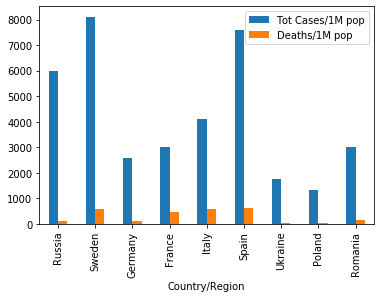

In [37]:
ax = barpy_stats.plot.bar()

In [38]:
barpy_stats_totals = europe_stats.drop(["Continent",'Population', 'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Tests/1M pop', 'TotalTests'], axis=1)
barpy_stats_totals = barpy_stats_totals.set_index("Country/Region")
barpy_stats_totals

,TotalCases,TotalDeaths
Country/Region,,
Russia,871894,14606.0
Sweden,81967,5766.0
Germany,215210,9252.0
France,195633,30312.0
Italy,249204,35187.0
Spain,354530,28500.0
Ukraine,76808,1819.0
Poland,49515,1774.0
Romania,57895,2566.0


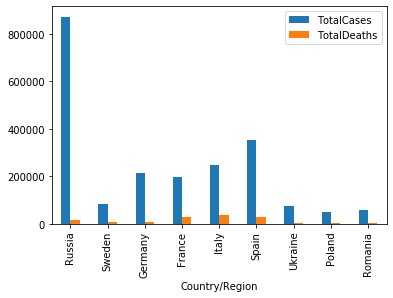

In [39]:
bx = barpy_stats_totals.plot.bar()

In [40]:
barpy_stats_tests = europe_stats.drop(["Continent",'Population', 'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'TotalDeaths', 'TotalCases'], axis=1)
barpy_stats_tests = barpy_stats_tests.set_index("Country/Region")
barpy_stats_tests


,Tests/1M pop
Country/Region,
Russia,203623.0
Sweden,85429.0
Germany,102452.0
France,61147.0
Italy,117443.0
Spain,151087.0
Ukraine,25549.0
Poland,62752.0
Romania,68631.0


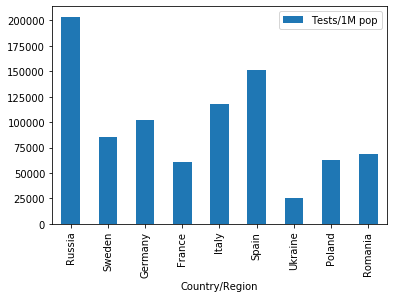

In [41]:
cx = barpy_stats_tests.plot.bar()

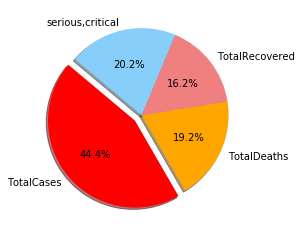

In [42]:
# Labels for the sections of our pie chart
labels = ["TotalCases", "TotalDeaths", "TotalRecovered", "serious,critical"]
# The values of each section of the pie chart
sizes = [220, 95, 80, 100]
# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]
# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()